In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import plot_roc_curve

from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_spam_ham_phishing.csv')

**Remove phishing emails, only consider ham and spam:**

In [3]:
df = df[df['label'] != 2]
print(df.shape)

(75419, 95)


In [4]:
df_Y = df['label']
df_X = df.drop('label', axis=1)

In [5]:
scaler = StandardScaler()

feature_list = df_X.columns

scaler.fit(df_X)
df_X = scaler.transform(df_X)
df_X = pd.DataFrame(df_X, columns=feature_list)

In [6]:
len(feature_list)

94

# **Embedded Model Features Importances:**

**Logistic Regression Feature Importance:**

Top features sorted:
Feature: missing_x-beenthere, Score: 5.566016
Feature: missing_x-spam-checker-version, Score: 5.435348
Feature: missing_in-reply-to, Score: 2.174025
Feature: domain_match_to_message-id, Score: 2.155866
Feature: missing_x-spam-check-by, Score: 2.028611
Feature: missing_x-virus-status, Score: 2.006021
Feature: missing_x-mailing-list, Score: 1.762360
Feature: missing_received-spf, Score: 1.709957
Feature: missing_delivered-to, Score: 1.538967
Feature: missing_reply-to, Score: 1.467246
Feature: received_str_forged, Score: 1.340308
Feature: missing_mailing-list, Score: 1.258246
Feature: missing_list-id, Score: 1.251394
Feature: missing_cc, Score: 1.241359
Feature: missing_list-archive, Score: 1.065882
Feature: missing_sender, Score: 0.934322
Feature: num_recipients_cc, Score: 0.924197
Feature: domain_match_return-path_reply-to, Score: 0.918377
Feature: domain_match_from_reply-to, Score: 0.865204
Feature: str_to_chevron, Score: 0.765452
Feature: missing_importance, Score

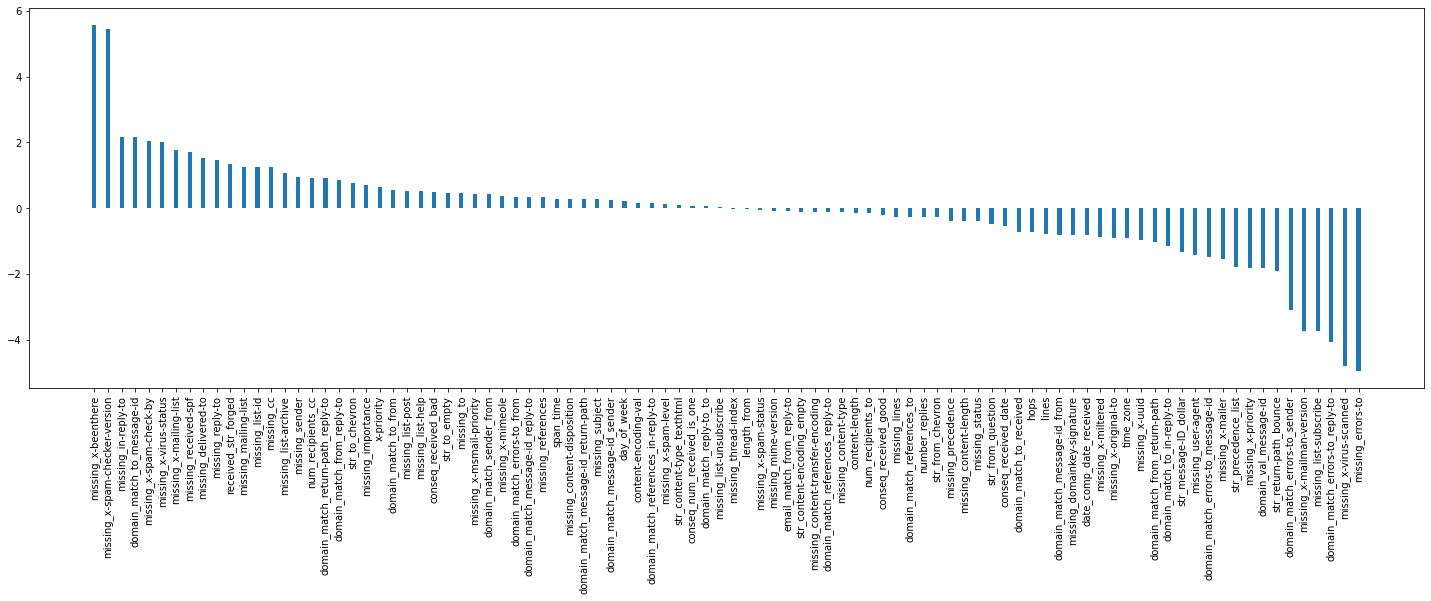

In [39]:
model = LogisticRegression(max_iter=500)

model.fit(df_X, df_Y)

importance = model.coef_[0]

fig = plt.figure(figsize =(25, 7))

importances_sorted = sorted(zip(importance, feature_list), reverse=True)
feature_sorted, importance_sorted = zip(*importances_sorted)

lr_feature_importances = importance_sorted

print("Top features sorted:")
for x, imp in zip(feature_sorted, importance_sorted):
  print('Feature: %s, Score: %f' % (imp, x))

plt.xticks(rotation='vertical')
plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
plt.savefig('linReg_featureImportance.png', bbox_inches='tight')
plt.show()

**Function code:**

In [8]:
def perform_importance_test(model):
    model.fit(df_X, df_Y)

    importance = model.feature_importances_

    fig = plt.figure(figsize =(25, 7))

    importances_sorted = sorted(zip(importance, feature_list), reverse=True)
    feature_sorted, importance_sorted = zip(*importances_sorted)

    print("Top features sorted:")
    for x, imp in zip(feature_sorted, importance_sorted):
        print('Feature: %s, Score: %f' % (imp, x))

    plt.xticks(rotation='vertical')
    plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
    plt.show()

    return importance_sorted

**Decision Tree Feature Importance:**

Top features sorted:
Feature: missing_precedence, Score: 0.646064
Feature: time_zone, Score: 0.038083
Feature: str_message-ID_dollar, Score: 0.036808
Feature: str_content-type_texthtml, Score: 0.029346
Feature: missing_thread-index, Score: 0.027235
Feature: missing_content-disposition, Score: 0.026597
Feature: str_precedence_list, Score: 0.023632
Feature: str_to_chevron, Score: 0.017458
Feature: str_return-path_bounce, Score: 0.015111
Feature: date_comp_date_received, Score: 0.014216
Feature: missing_mime-version, Score: 0.011783
Feature: missing_x-mailer, Score: 0.009086
Feature: length_from, Score: 0.009067
Feature: missing_x-spam-status, Score: 0.008093
Feature: domain_match_errors-to_reply-to, Score: 0.007694
Feature: span_time, Score: 0.007063
Feature: missing_x-miltered, Score: 0.005819
Feature: str_from_question, Score: 0.005353
Feature: domain_val_message-id, Score: 0.005136
Feature: domain_match_message-id_from, Score: 0.005089
Feature: missing_user-agent, Score: 0.003979
Feat

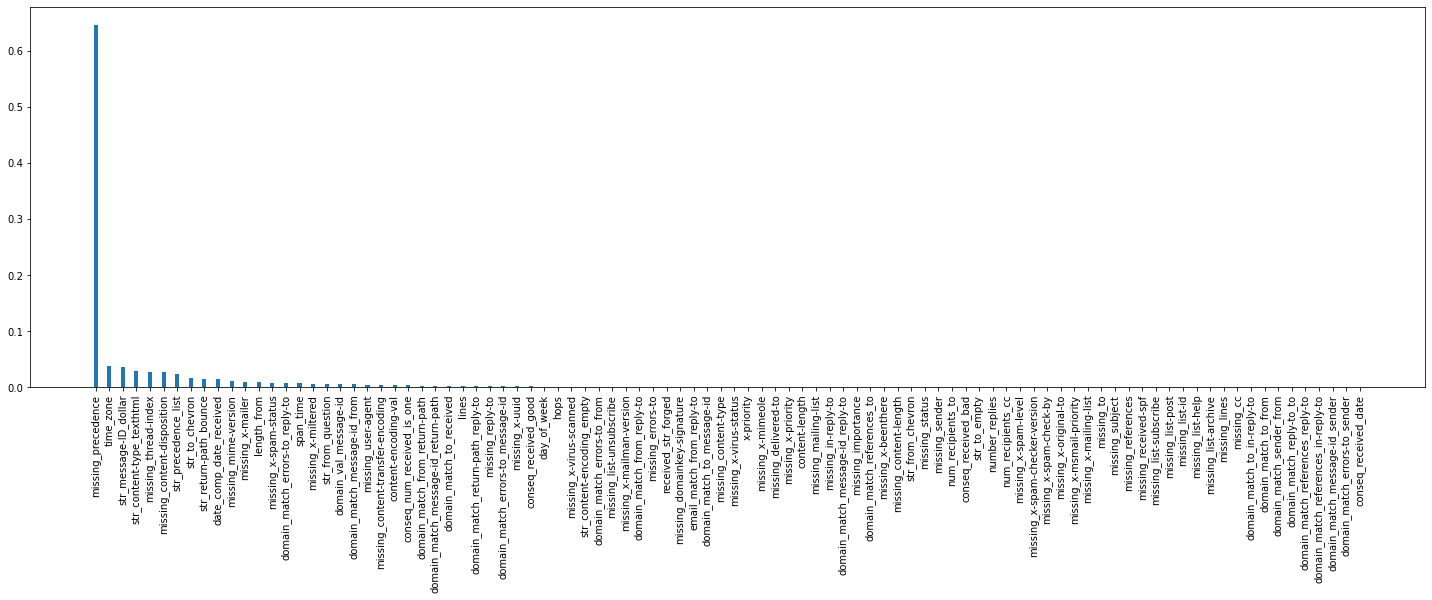

('missing_precedence',
 'time_zone',
 'str_message-ID_dollar',
 'str_content-type_texthtml',
 'missing_thread-index',
 'missing_content-disposition',
 'str_precedence_list',
 'str_to_chevron',
 'str_return-path_bounce',
 'date_comp_date_received',
 'missing_mime-version',
 'missing_x-mailer',
 'length_from',
 'missing_x-spam-status',
 'domain_match_errors-to_reply-to',
 'span_time',
 'missing_x-miltered',
 'str_from_question',
 'domain_val_message-id',
 'domain_match_message-id_from',
 'missing_user-agent',
 'missing_content-transfer-encoding',
 'content-encoding-val',
 'conseq_num_received_is_one',
 'domain_match_from_return-path',
 'domain_match_message-id_return-path',
 'domain_match_to_received',
 'lines',
 'domain_match_return-path_reply-to',
 'missing_reply-to',
 'domain_match_errors-to_message-id',
 'missing_x-uuid',
 'conseq_received_good',
 'day_of_week',
 'hops',
 'missing_x-virus-scanned',
 'str_content-encoding_empty',
 'domain_match_errors-to_from',
 'missing_list-unsubscr

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
perform_importance_test(model)

**Random Forest Feature Importance:**

Top features sorted:
Feature: missing_list-subscribe, Score: 0.101859
Feature: missing_precedence, Score: 0.067157
Feature: missing_list-help, Score: 0.064701
Feature: missing_list-post, Score: 0.059137
Feature: missing_list-unsubscribe, Score: 0.056983
Feature: missing_x-spam-status, Score: 0.052982
Feature: missing_list-id, Score: 0.038442
Feature: str_precedence_list, Score: 0.036696
Feature: missing_x-spam-checker-version, Score: 0.028764
Feature: time_zone, Score: 0.021289
Feature: missing_sender, Score: 0.019988
Feature: domain_match_to_received, Score: 0.018317
Feature: domain_match_errors-to_sender, Score: 0.018276
Feature: missing_x-mailer, Score: 0.016686
Feature: missing_errors-to, Score: 0.016608
Feature: missing_x-priority, Score: 0.015656
Feature: str_return-path_bounce, Score: 0.014789
Feature: missing_x-beenthere, Score: 0.013626
Feature: str_message-ID_dollar, Score: 0.013282
Feature: missing_delivered-to, Score: 0.012559
Feature: missing_references, Score: 0.012332
Fe

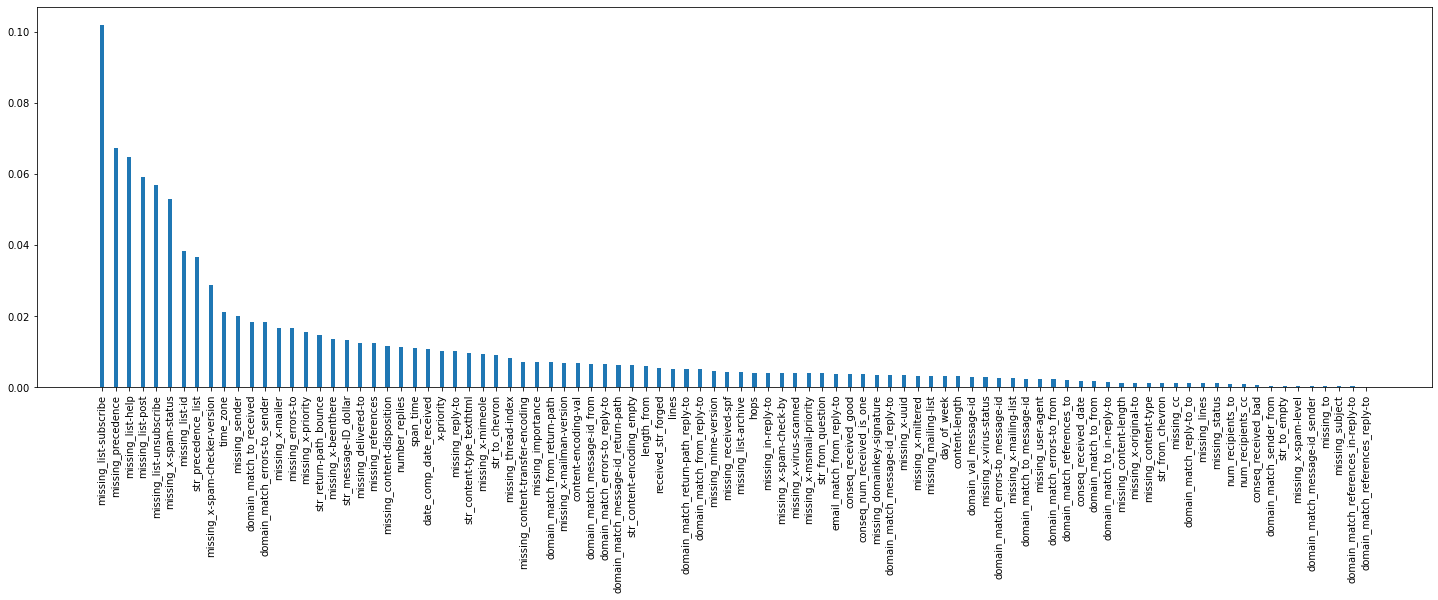

('missing_list-subscribe',
 'missing_precedence',
 'missing_list-help',
 'missing_list-post',
 'missing_list-unsubscribe',
 'missing_x-spam-status',
 'missing_list-id',
 'str_precedence_list',
 'missing_x-spam-checker-version',
 'time_zone',
 'missing_sender',
 'domain_match_to_received',
 'domain_match_errors-to_sender',
 'missing_x-mailer',
 'missing_errors-to',
 'missing_x-priority',
 'str_return-path_bounce',
 'missing_x-beenthere',
 'str_message-ID_dollar',
 'missing_delivered-to',
 'missing_references',
 'missing_content-disposition',
 'number_replies',
 'span_time',
 'date_comp_date_received',
 'x-priority',
 'missing_reply-to',
 'str_content-type_texthtml',
 'missing_x-mimeole',
 'str_to_chevron',
 'missing_thread-index',
 'missing_content-transfer-encoding',
 'missing_importance',
 'domain_match_from_return-path',
 'missing_x-mailman-version',
 'content-encoding-val',
 'domain_match_message-id_from',
 'domain_match_errors-to_reply-to',
 'domain_match_message-id_return-path',
 

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
perform_importance_test(model)

**Gradient Boosting Feature Importance:**

Top features sorted:
Feature: missing_precedence, Score: 0.460488
Feature: missing_list-subscribe, Score: 0.247141
Feature: time_zone, Score: 0.038909
Feature: str_return-path_bounce, Score: 0.030128
Feature: str_message-ID_dollar, Score: 0.028788
Feature: missing_content-disposition, Score: 0.022118
Feature: missing_thread-index, Score: 0.020690
Feature: missing_x-priority, Score: 0.017547
Feature: missing_x-spam-status, Score: 0.015816
Feature: str_content-type_texthtml, Score: 0.014846
Feature: missing_x-mailer, Score: 0.013723
Feature: str_precedence_list, Score: 0.008724
Feature: received_str_forged, Score: 0.007936
Feature: missing_content-transfer-encoding, Score: 0.007814
Feature: domain_match_message-id_return-path, Score: 0.006003
Feature: str_content-encoding_empty, Score: 0.005641
Feature: domain_match_from_return-path, Score: 0.005404
Feature: date_comp_date_received, Score: 0.005245
Feature: missing_x-uuid, Score: 0.004730
Feature: missing_reply-to, Score: 0.004648
Featur

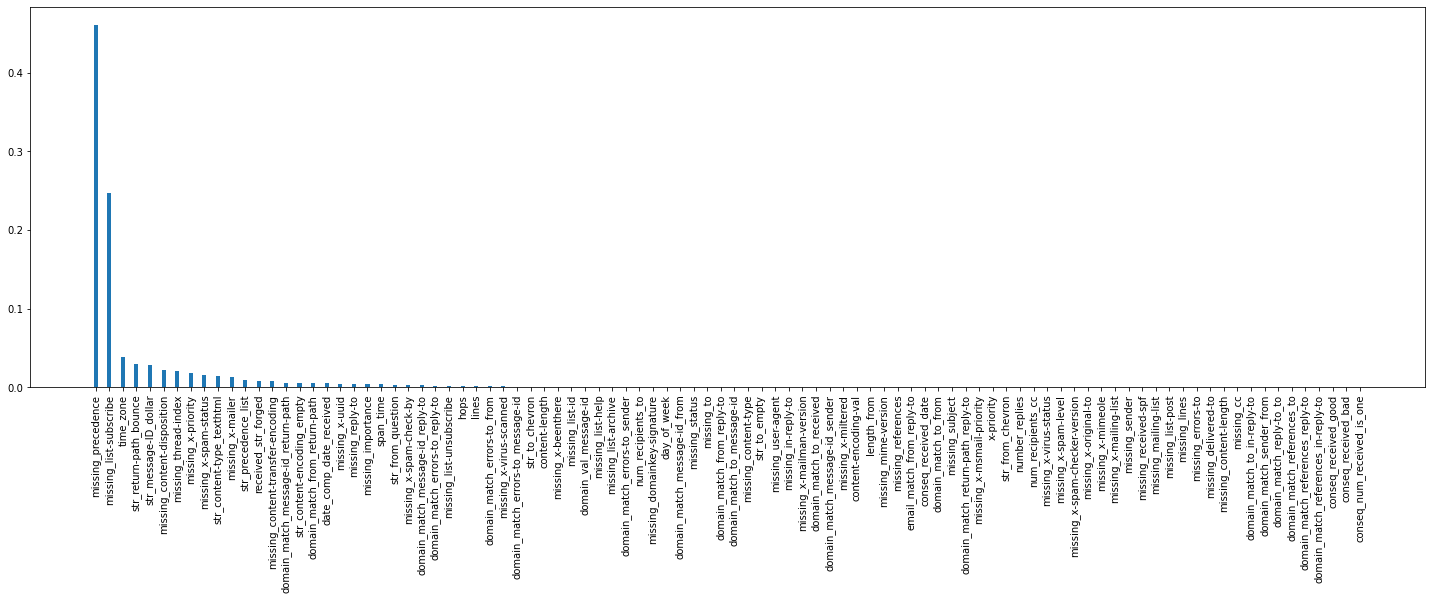

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
gb_feature_importances = perform_importance_test(model)

# **PCA:**

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40)

pca.fit_transform(df_X)

array([[-3.12907696,  1.50157332,  0.97248024, ..., -1.12116694,
        -0.31131922, -0.31392621],
       [ 5.9455023 ,  0.14249841, -3.14803645, ..., -0.98693711,
        -0.78194419,  0.78574303],
       [-4.11519536, -0.36950598, -1.48333798, ...,  0.25927218,
         0.04028436,  0.48502189],
       ...,
       [-2.70764181,  0.05021121,  1.61475524, ..., -0.1225396 ,
        -0.28667299,  0.93754384],
       [-3.75232123,  0.18094353, -1.24481094, ..., -0.34063379,
         0.16580792, -0.5290474 ],
       [-3.79548935, -0.43274245, -0.5620965 , ...,  0.02294843,
         0.34256804, -0.25029591]])

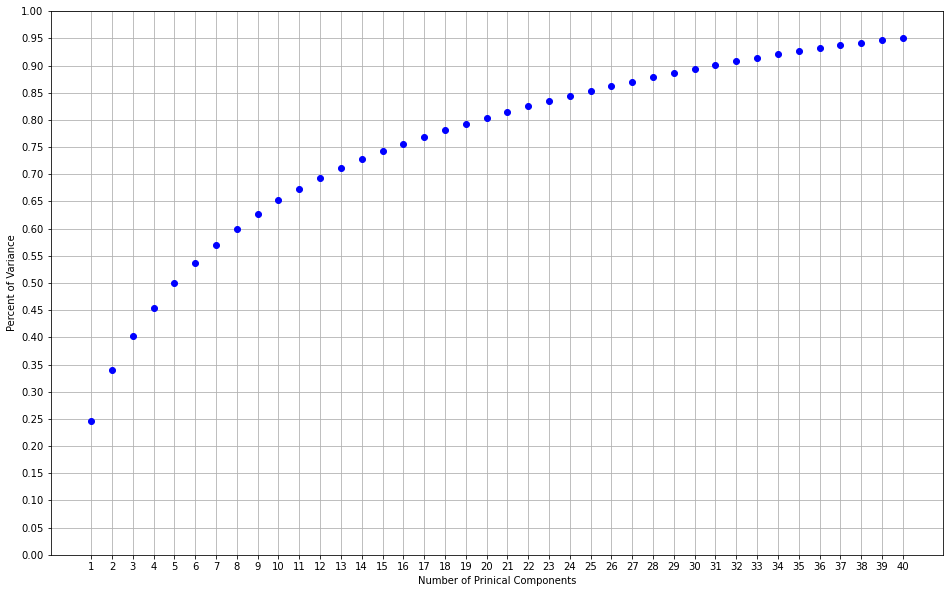

In [13]:
# Show the importance of each PCA
from matplotlib.pyplot import figure
plt.plot(np.arange(1, 41, 1), pca.explained_variance_ratio_.cumsum(), 'bo')
plt.grid()
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(np.arange(1, 41, 1))
plt.xlabel('Number of Prinical Components')
plt.ylabel('Percent of Variance')
fig = plt.gcf()
fig.set_size_inches(16, 10)
#plt.savefig('PCA_num_components.png', bbox_inches='tight')
plt.show()

In [14]:
print(pca.explained_variance_ratio_.cumsum())

# number of components
n_pcs = pca.components_.shape[0]

print(n_pcs)
print(pca.components_[0])

pca_to_check = 0
mapping_dict = dict(zip(feature_list, np.abs(pca.components_[pca_to_check])))
sorted_dict = {k: v for k, v in sorted(mapping_dict.items(), key=lambda item: item[1], reverse=True)}

print()
for k,v in sorted_dict.items():
    print(k,v)

[0.2463932  0.34023106 0.40243621 0.4548289  0.50066692 0.53645666
 0.5698125  0.60005523 0.62704803 0.65180353 0.67341007 0.69395065
 0.71184524 0.72728408 0.74211324 0.7560067  0.76923344 0.78201597
 0.79314156 0.80408529 0.81459443 0.8248769  0.83474704 0.84445934
 0.85362913 0.86216759 0.87064    0.87866005 0.88653066 0.89414813
 0.9013741  0.90849746 0.91480448 0.92065688 0.92637075 0.93190906
 0.9371692  0.9421313  0.94656766 0.95091855]
40
[ 0.14640252 -0.01218493 -0.00694391  0.01864398  0.02902543  0.09631334
 -0.09618879  0.09050174  0.09140631 -0.19760326  0.02639889 -0.00844638
  0.03105315  0.03091088 -0.19517827 -0.12814828 -0.19552038 -0.19751711
 -0.19754237 -0.19754237  0.07581352 -0.17942698 -0.17069759 -0.1681917
 -0.17162118 -0.17149922 -0.04242295 -0.170315    0.07425917  0.07446879
  0.07199659 -0.05274405 -0.16147297 -0.14387381 -0.14473883 -0.07656181
  0.03424313 -0.11605586 -0.06372884 -0.1130496  -0.08504094 -0.06397037
 -0.06399501 -0.02190976  0.02577594 -0

# Permutation Feature Importance Tests:

**Random Forest:**

Top features sorted:
Feature: time_zone, Score: 0.014552
Feature: missing_x-mailer, Score: 0.009938
Feature: length_from, Score: 0.004064
Feature: str_content-type_texthtml, Score: 0.003965
Feature: str_to_chevron, Score: 0.003686
Feature: domain_match_from_return-path, Score: 0.003494
Feature: date_comp_date_received, Score: 0.003070
Feature: domain_match_message-id_from, Score: 0.002360
Feature: missing_thread-index, Score: 0.001783
Feature: str_return-path_bounce, Score: 0.001352
Feature: domain_match_message-id_return-path, Score: 0.001319
Feature: span_time, Score: 0.001134
Feature: missing_mime-version, Score: 0.000769
Feature: missing_user-agent, Score: 0.000716
Feature: content-length, Score: 0.000510
Feature: day_of_week, Score: 0.000510
Feature: missing_precedence, Score: 0.000464
Feature: missing_reply-to, Score: 0.000451
Feature: lines, Score: 0.000451
Feature: missing_domainkey-signature, Score: 0.000331
Feature: domain_match_to_received, Score: 0.000292
Feature: missing_x

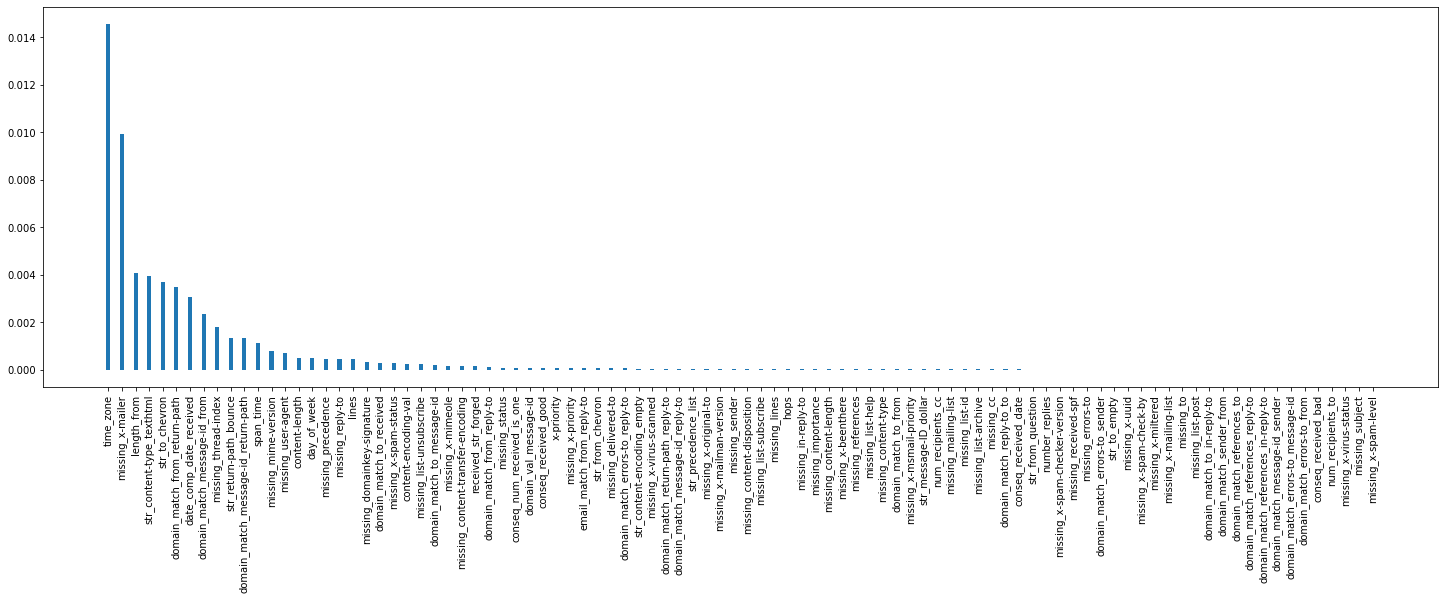

In [7]:
model = RandomForestClassifier(n_estimators=150, criterion='gini', min_samples_split=3, min_samples_leaf=1, max_features='log2')
model.fit(df_X, df_Y)

results = permutation_importance(model, df_X, df_Y, 
                                 scoring='accuracy', n_repeats=2, n_jobs=-1)
importance = results.importances_mean

fig = plt.figure(figsize =(25, 7))

importances_sorted = sorted(zip(importance, feature_list), reverse=True)
feature_sorted, importance_sorted = zip(*importances_sorted)

perm_rf_feature_importances = importance_sorted

print("Top features sorted:")
for x, imp in zip(feature_sorted, importance_sorted):
  print('Feature: %s, Score: %f' % (imp, x))

plt.xticks(rotation='vertical')
plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
plt.show()

**SVM:**

Top features sorted:
Feature: time_zone, Score: 0.015314
Feature: str_content-type_texthtml, Score: 0.014844
Feature: missing_x-mailing-list, Score: 0.012079
Feature: missing_importance, Score: 0.011768
Feature: missing_content-disposition, Score: 0.006371
Feature: domain_match_to_from, Score: 0.004720
Feature: domain_val_message-id, Score: 0.004714
Feature: missing_thread-index, Score: 0.004502
Feature: domain_match_errors-to_from, Score: 0.003931
Feature: str_from_question, Score: 0.003368
Feature: str_to_chevron, Score: 0.002751
Feature: missing_domainkey-signature, Score: 0.002658
Feature: str_from_chevron, Score: 0.002426
Feature: length_from, Score: 0.001989
Feature: date_comp_date_received, Score: 0.001929
Feature: missing_user-agent, Score: 0.001757
Feature: domain_match_errors-to_message-id, Score: 0.001730
Feature: missing_mime-version, Score: 0.001379
Feature: missing_mailing-list, Score: 0.001359
Feature: str_precedence_list, Score: 0.001273
Feature: str_return-path_bounce,

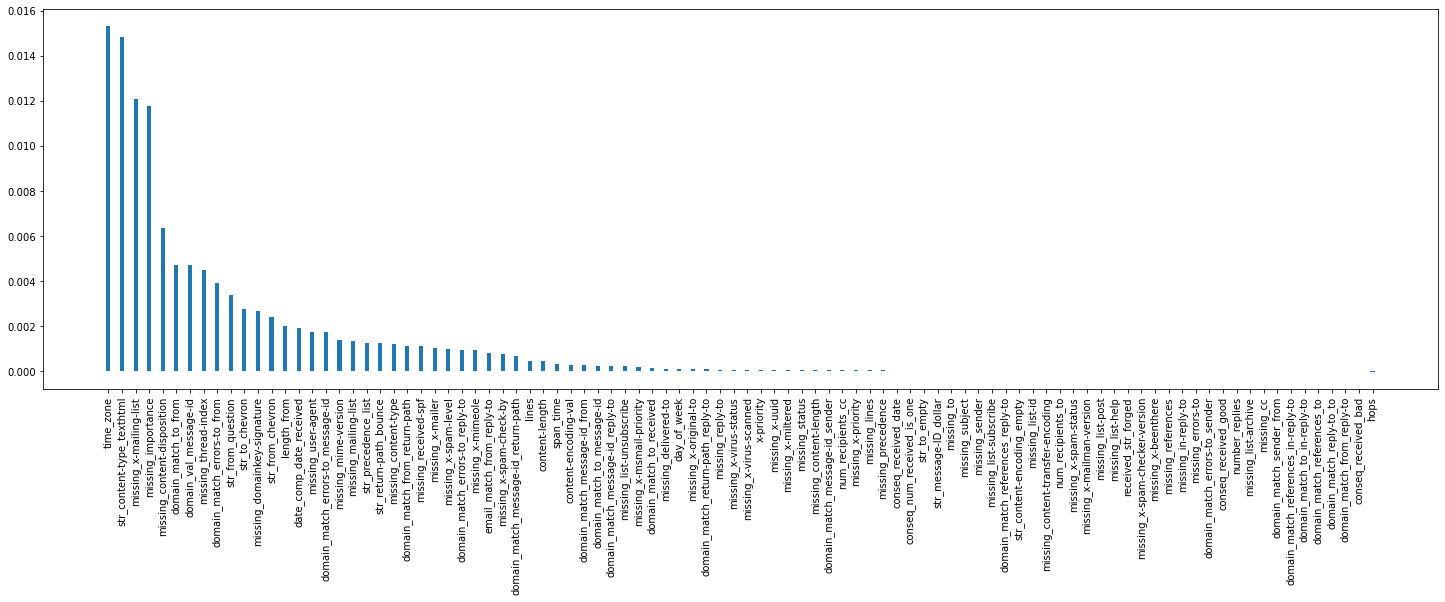

In [8]:
model = SVC(C=10, kernel='poly', degree=4, tol=0.01)
model.fit(df_X, df_Y)

results = permutation_importance(model, df_X, df_Y, 
                                 scoring='accuracy', n_repeats=2, n_jobs=-1)
importance = results.importances_mean

fig = plt.figure(figsize =(25, 7))

importances_sorted = sorted(zip(importance, feature_list), reverse=True)
feature_sorted, importance_sorted = zip(*importances_sorted)

perm_svm_feature_importances = importance_sorted

print("Top features sorted:")
for x, imp in zip(feature_sorted, importance_sorted):
  print('Feature: %s, Score: %f' % (imp, x))

plt.xticks(rotation='vertical')
plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
plt.show()

**MLP:**

Top features sorted:
Feature: time_zone, Score: 0.013863
Feature: str_to_chevron, Score: 0.012610
Feature: missing_importance, Score: 0.012331
Feature: domain_match_from_return-path, Score: 0.007445
Feature: missing_x-mailman-version, Score: 0.007366
Feature: str_return-path_bounce, Score: 0.006756
Feature: str_content-type_texthtml, Score: 0.006689
Feature: missing_user-agent, Score: 0.005980
Feature: missing_x-mailer, Score: 0.004468
Feature: missing_list-unsubscribe, Score: 0.004117
Feature: str_from_chevron, Score: 0.003786
Feature: missing_mime-version, Score: 0.003713
Feature: str_from_question, Score: 0.003441
Feature: domain_match_message-id_reply-to, Score: 0.003202
Feature: date_comp_date_received, Score: 0.003176
Feature: domain_val_message-id, Score: 0.003109
Feature: domain_match_message-id_from, Score: 0.002765
Feature: domain_match_sender_from, Score: 0.002486
Feature: received_str_forged, Score: 0.002413
Feature: domain_match_message-id_return-path, Score: 0.002261
Feat

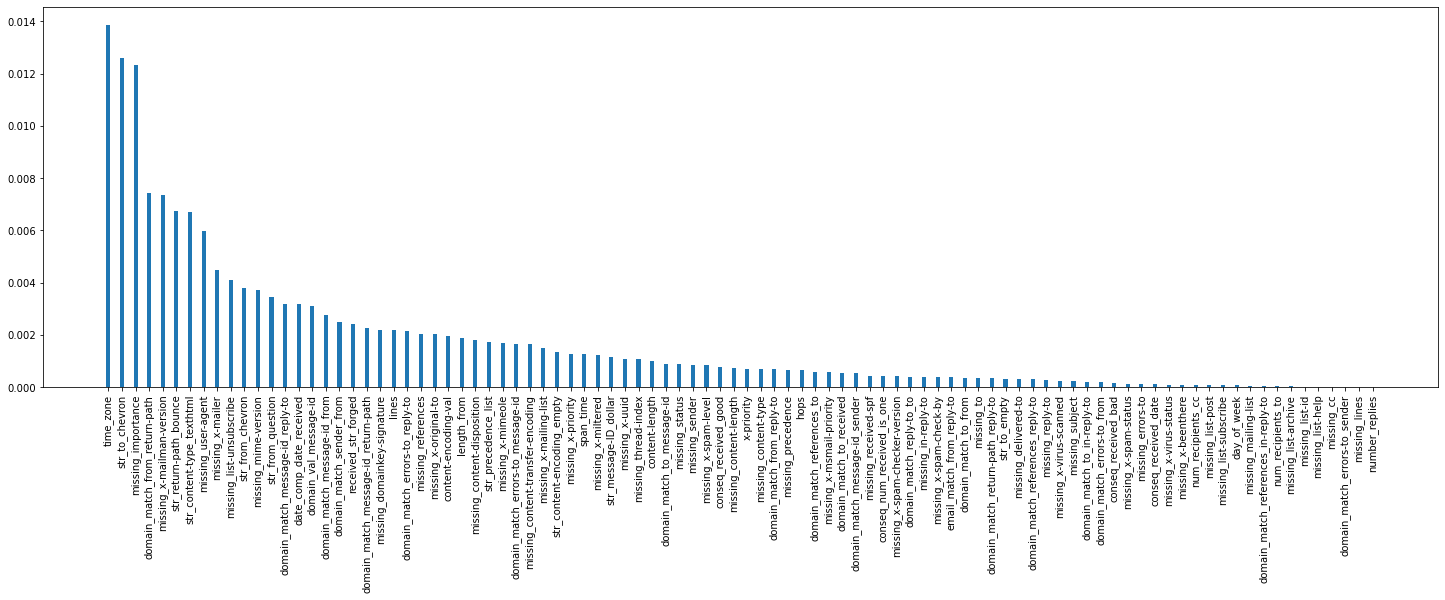

In [9]:
model = MLPClassifier(hidden_layer_sizes=(40,40), activation='relu', learning_rate='constant', alpha=0.001, solver='adam')
model.fit(df_X, df_Y)

results = permutation_importance(model, df_X, df_Y, 
                                 scoring='accuracy', n_repeats=2, n_jobs=-1)
importance = results.importances_mean

fig = plt.figure(figsize =(25, 7))

importances_sorted = sorted(zip(importance, feature_list), reverse=True)
feature_sorted, importance_sorted = zip(*importances_sorted)

perm_mlp_feature_importances = importance_sorted

print("Top features sorted:")
for x, imp in zip(feature_sorted, importance_sorted):
  print('Feature: %s, Score: %f' % (imp, x))

plt.xticks(rotation='vertical')
plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
plt.show()

**Finding the best features across the models:**

In [10]:
top_n = 25

top = [ perm_rf_feature_importances[:top_n],
        perm_svm_feature_importances[:top_n],
        perm_mlp_feature_importances[:top_n]]

counter_dict = {}

for li in top:
    for i, x in enumerate(li):
        if x in counter_dict:
            counter_dict[x] += len(li) - i
        else:
            counter_dict[x] = len(li) - i
        
output_dict = dict(sorted(counter_dict.items(), key=lambda item: item[1], reverse=True))

c = 1
for k, v in output_dict.items():
    new_k = k.replace('_', '-')
    print(c, "&", new_k, "&", v, "\\\\ \hline")
    c += 1
    
for k, v in output_dict.items():
    print('\'' + k + '\',')

1 & time-zone & 75 \\ \hline
2 & str-content-type-texthtml & 65 \\ \hline
3 & str-to-chevron & 60 \\ \hline
4 & domain-match-from-return-path & 45 \\ \hline
5 & missing-importance & 45 \\ \hline
6 & missing-x-mailer & 42 \\ \hline
7 & date-comp-date-received & 41 \\ \hline
8 & str-return-path-bounce & 41 \\ \hline
9 & missing-user-agent & 40 \\ \hline
10 & length-from & 35 \\ \hline
11 & missing-thread-index & 35 \\ \hline
12 & missing-mime-version & 35 \\ \hline
13 & domain-val-message-id & 29 \\ \hline
14 & str-from-question & 29 \\ \hline
15 & str-from-chevron & 28 \\ \hline
16 & domain-match-message-id-from & 27 \\ \hline
17 & missing-domainkey-signature & 25 \\ \hline
18 & missing-x-mailing-list & 23 \\ \hline
19 & domain-match-message-id-return-path & 21 \\ \hline
20 & missing-content-disposition & 21 \\ \hline
21 & missing-x-mailman-version & 21 \\ \hline
22 & domain-match-to-from & 20 \\ \hline
23 & missing-list-unsubscribe & 18 \\ \hline
24 & domain-match-errors-to-from & 17 \

# **Chi2 Feature Importance:**

In [24]:
minmax_scaler = MinMaxScaler()

X_vals_positive = minmax_scaler.fit_transform(df_X)
df_pos_vals = pd.DataFrame(X_vals_positive, columns=feature_list)

selector = SelectKBest(chi2, k=20)
selector.fit(df_pos_vals, df_Y)

X_new = selector.transform(df_pos_vals)
print(X_new.shape)

df_pos_vals.columns[selector.get_support(indices=True)].tolist()

(75419, 20)


['hops',
 'missing_x-mailer',
 'missing_list-id',
 'missing_precedence',
 'missing_list-unsubscribe',
 'missing_list-subscribe',
 'missing_list-post',
 'missing_list-help',
 'missing_x-spam-status',
 'str_return-path_bounce',
 'str_precedence_list',
 'num_recipients_cc',
 'x-priority',
 'conseq_received_date',
 'domain_match_to_in-reply-to',
 'domain_match_errors-to_sender',
 'domain_match_errors-to_reply-to',
 'domain_match_references_in-reply-to',
 'domain_match_references_to',
 'domain_match_to_received']